# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [21]:
# Memuat dataset dalam bentuk tabular
file_id = '11yFNNKB90CFR-cXbzMpL1iuGnxmTa1OB'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

# Menampilkan lima baris pertama dataset
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [22]:
# Meninjau jumlah baris kolom dan jenis data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

In [23]:
# Menampilkan statistik deskriptif dataset
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


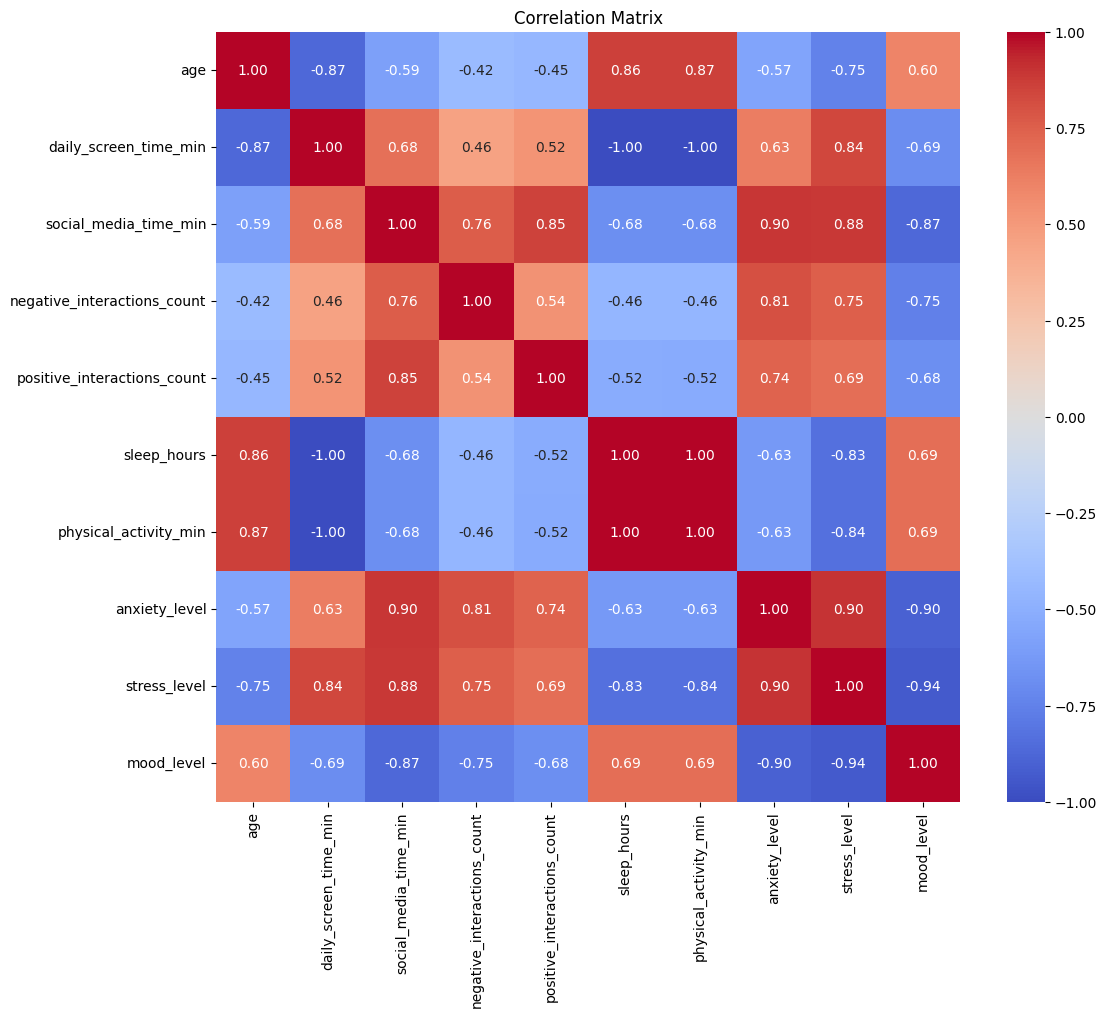

In [24]:
# Menampilkan korelasi antar fitur

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns


# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

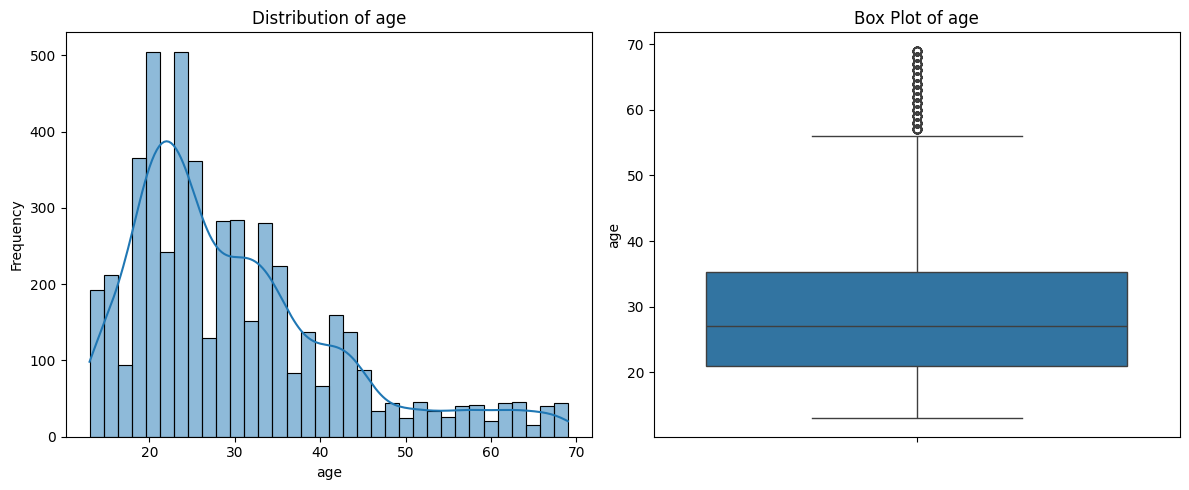

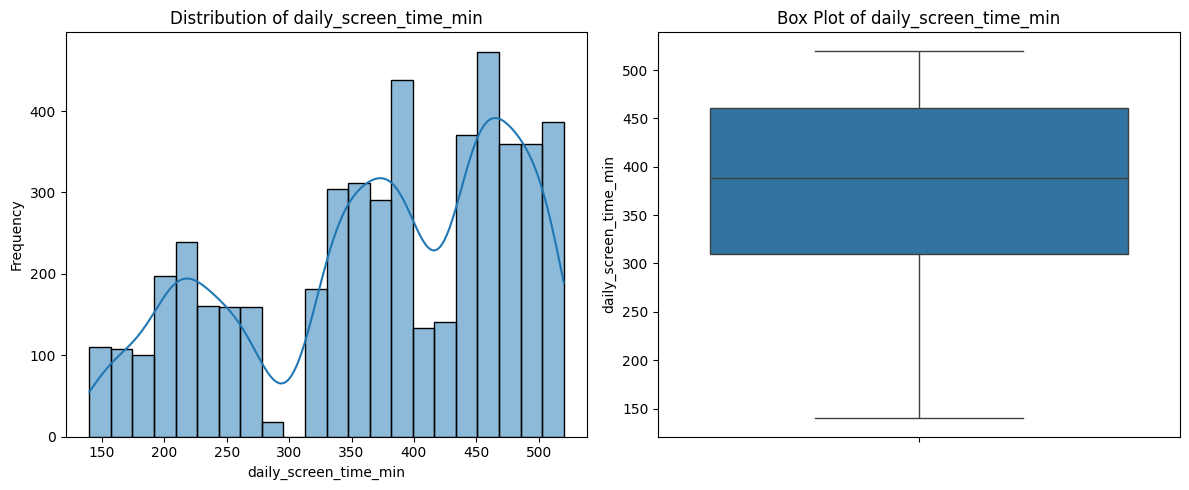

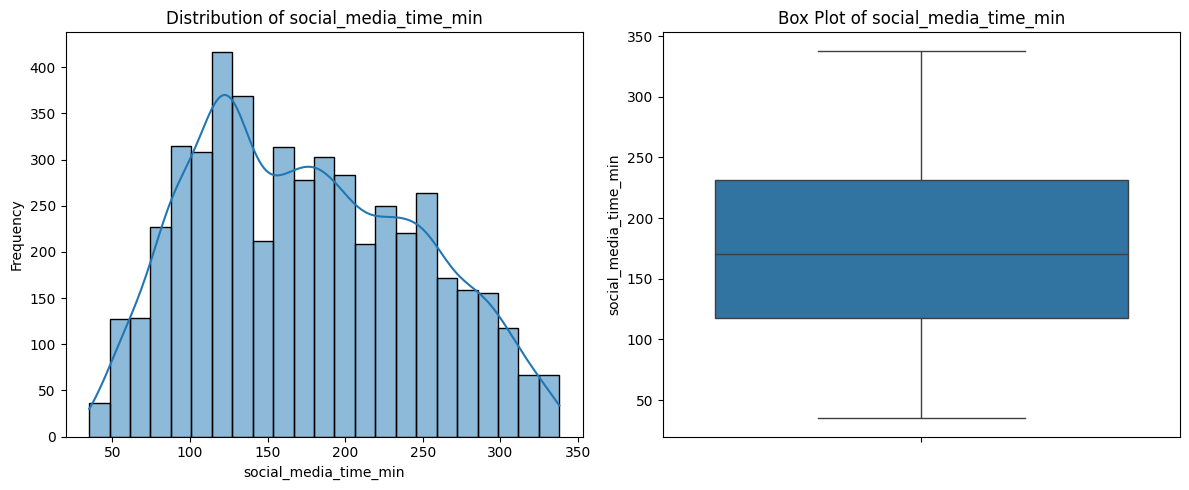

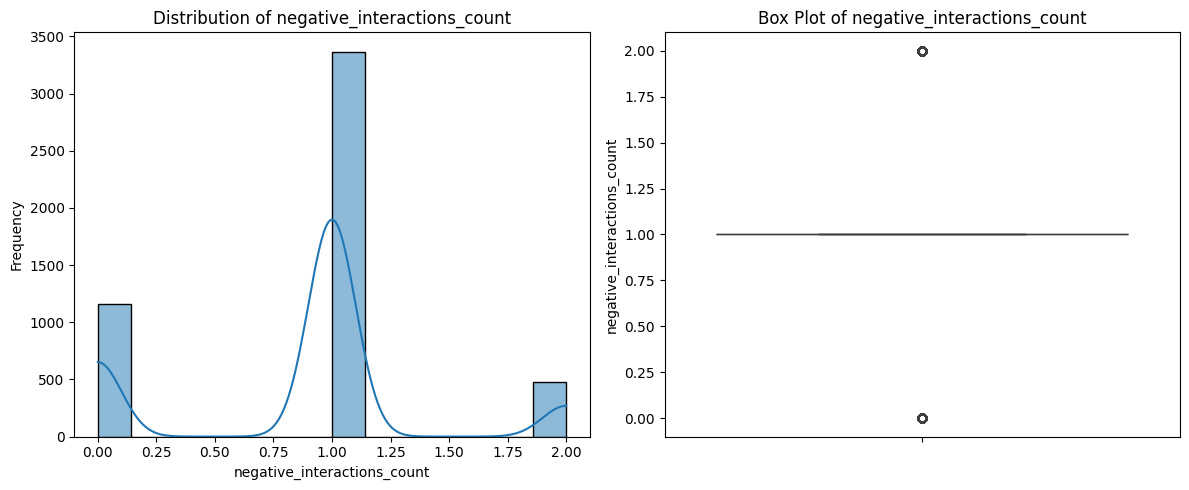

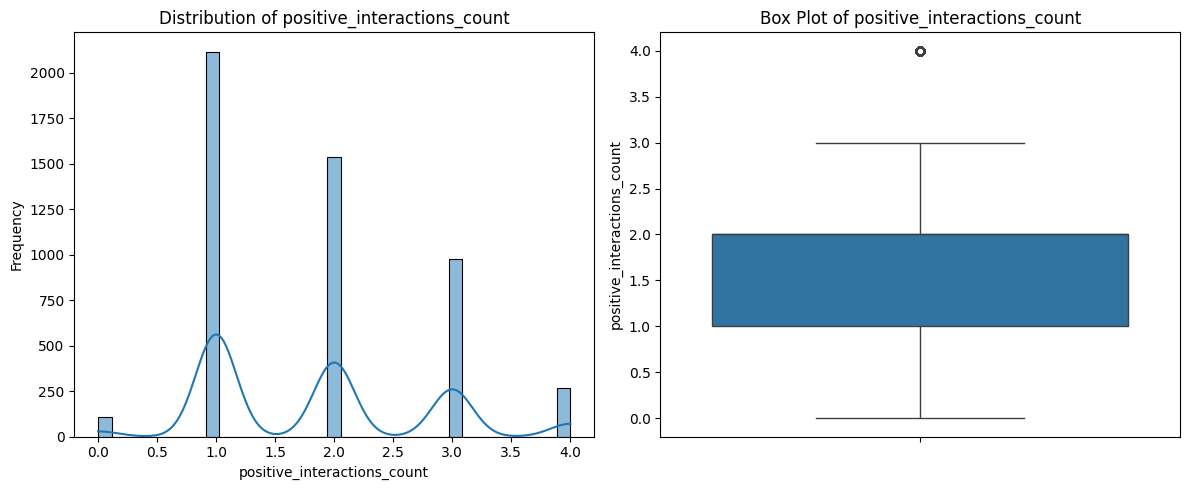

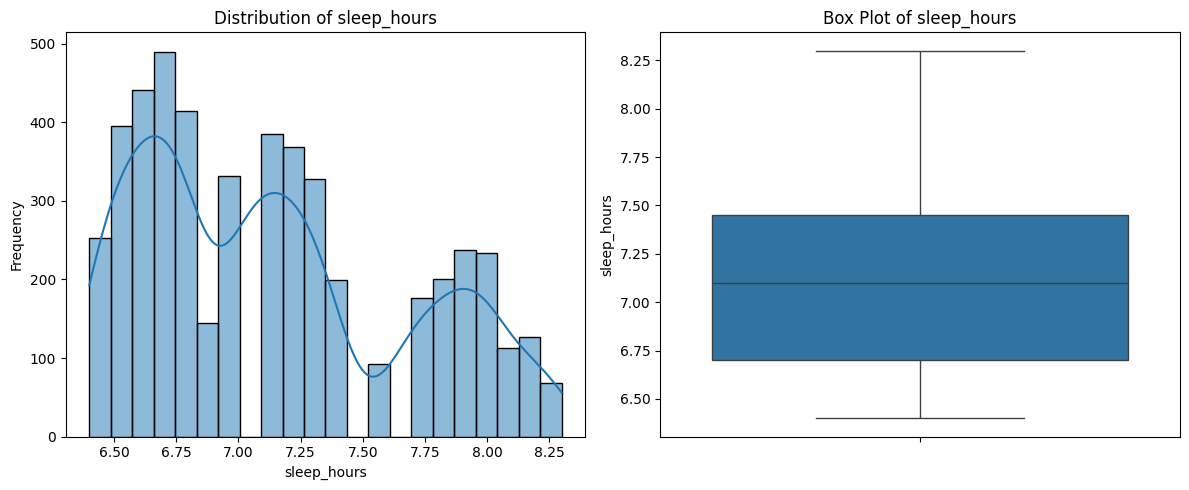

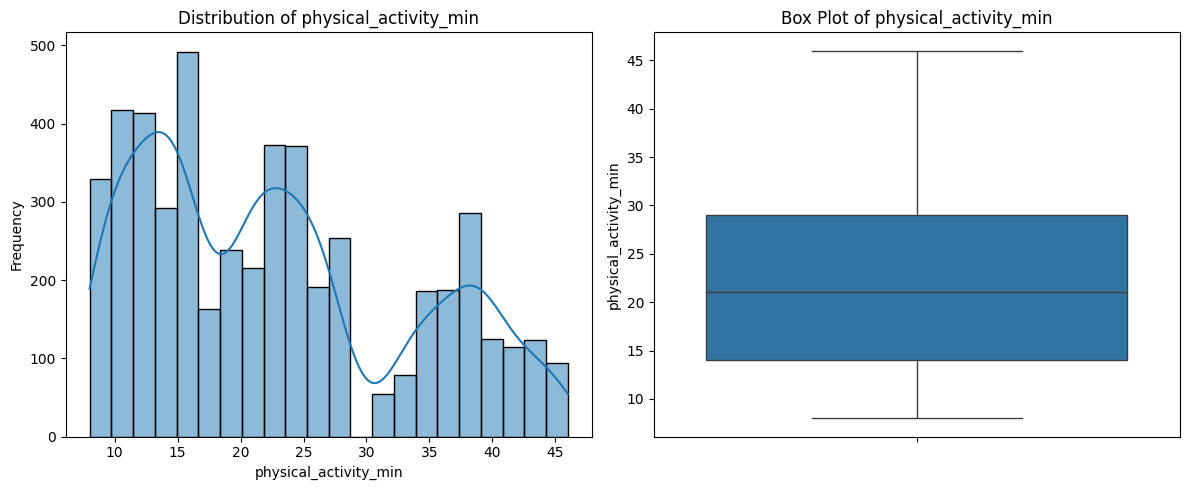

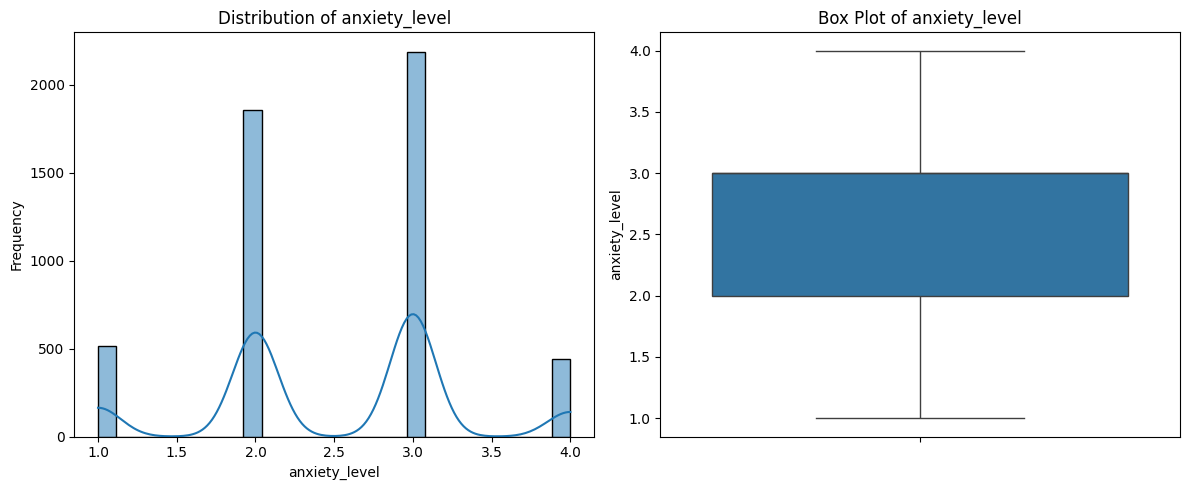

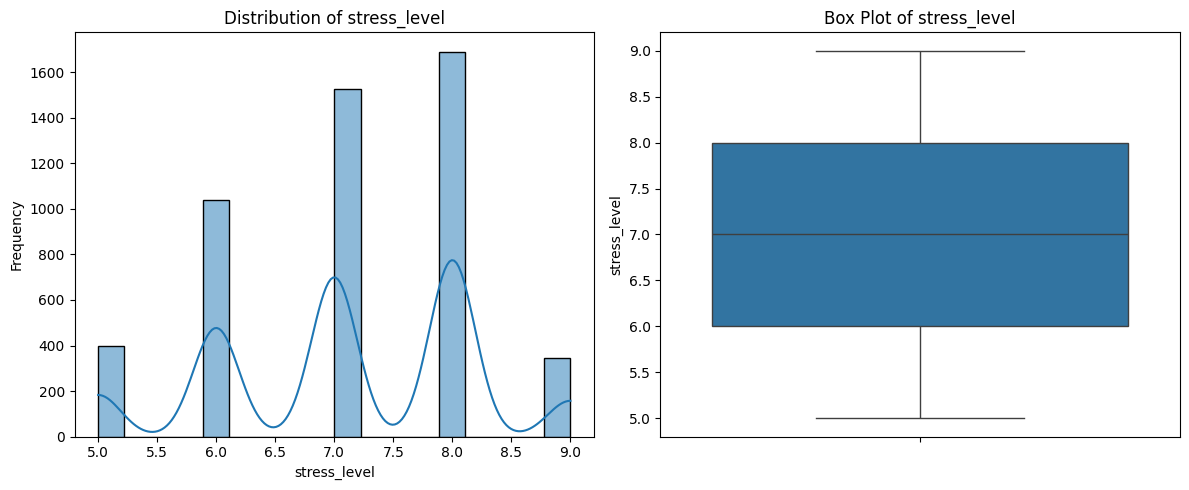

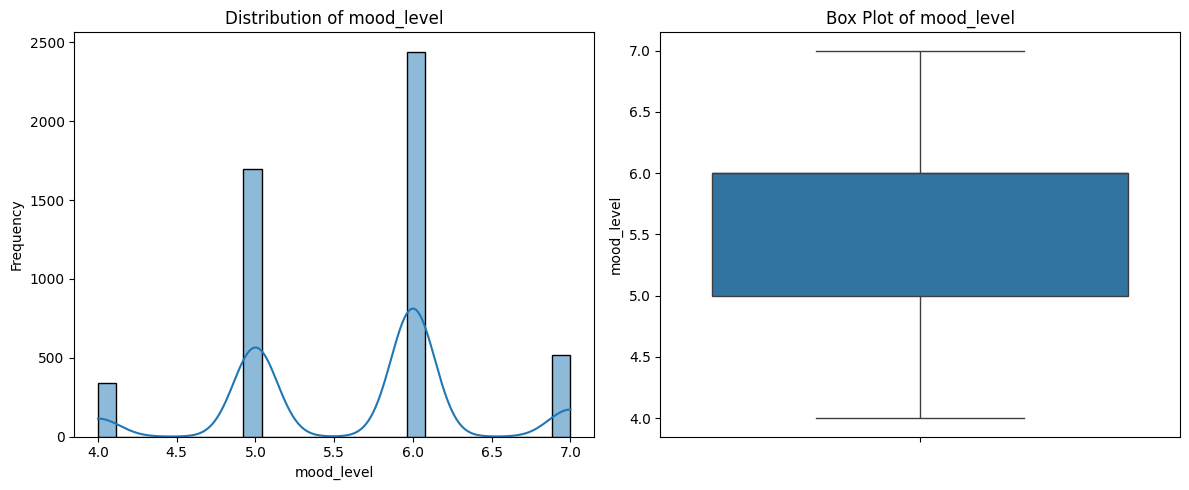

In [25]:
# Menampikan histogram dan boxplot untuk kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

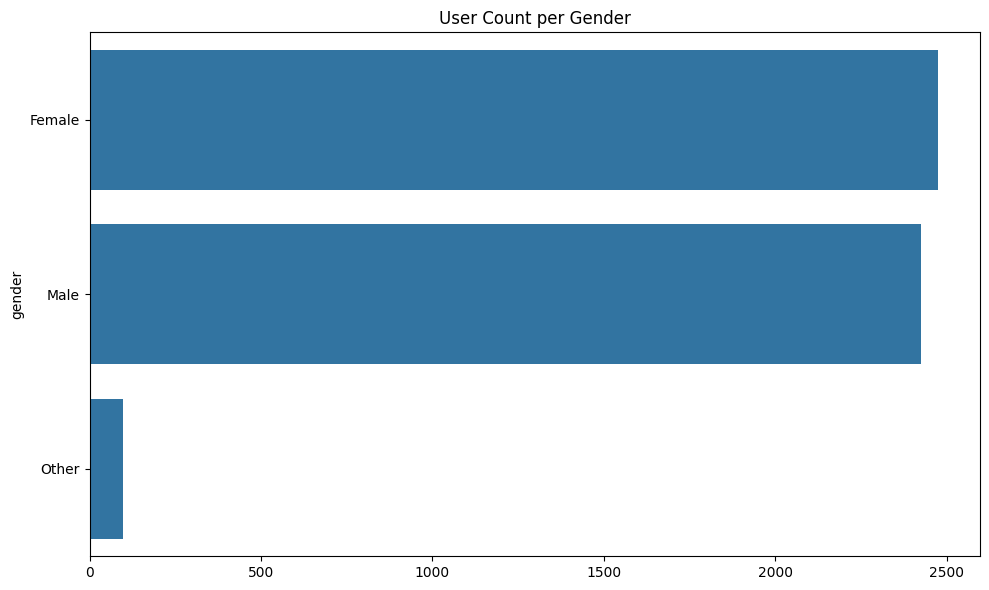

Value Counts for gender:
gender
Female    2474
Male      2427
Other       99
Name: count, dtype: int64



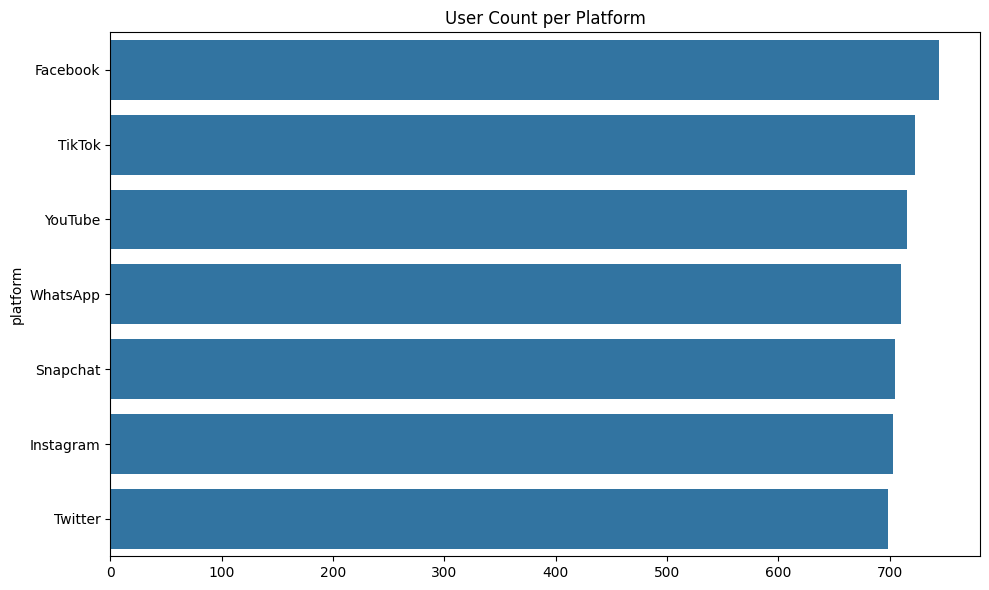

Value Counts for platform:
platform
Facebook     744
TikTok       723
YouTube      716
WhatsApp     710
Snapchat     705
Instagram    703
Twitter      699
Name: count, dtype: int64



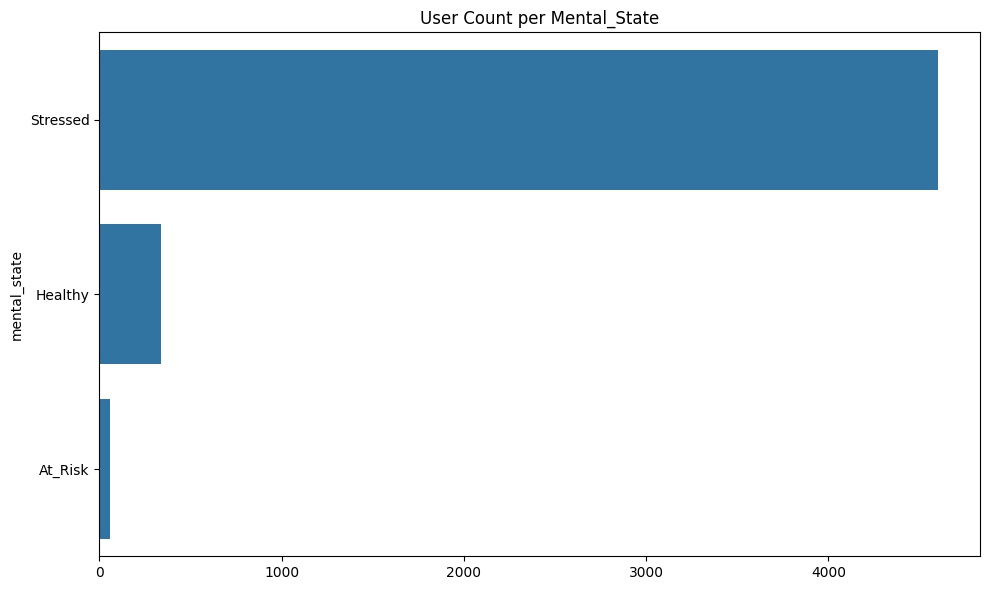

Value Counts for mental_state:
mental_state
Stressed    4601
Healthy      341
At_Risk       58
Name: count, dtype: int64



In [26]:
# Menampilkan barchart untuk fitur kategorikal (kecuali nama dan tanggal)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col in ['person_name', 'date']:
        # Menghapus baris print agar tidak ada output untuk kolom ini
        continue

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'User Count per {col.title()}')
    plt.xlabel('')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [27]:
# 1. Menghapus atau menangani data kosong
print(f'Count of Missing Values per Feature : \n{df.isnull().sum()} ')

Count of Missing Values per Feature : 
person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64 


In [28]:
# 2. Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'Count of Duplicate Rows : {df.duplicated().sum()}')

Count of Duplicate Rows : 0


In [29]:
# 3. Standarisasi fitur
scaler = StandardScaler()

# Menerapkan standarisasi pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Dataset setelah standarisasi fitur numerik:")
df.head()

Dataset setelah standarisasi fitur numerik:


,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,0.411460,1/1/2024,Male,Instagram,-0.500581,-0.215325,0.244632,0.174485,0.497701,0.500538,-0.642080,-0.101292,0.492465,Stressed
1,Neha Patel,-0.484399,1/12/2024,Female,Instagram,0.754215,0.711613,0.244632,1.234538,-0.815297,-0.725669,0.615914,0.840086,-0.823582,Stressed
2,Ananya Naidu,-0.321516,1/6/2024,Male,Snapchat,-0.151502,0.290278,0.244632,0.174485,0.122559,0.123243,0.615914,-0.101292,0.492465,Stressed
3,Neha Das,2.936156,1/17/2024,Female,Snapchat,-1.727073,-0.987773,-1.556780,-0.885569,1.623128,1.726744,-0.642080,-1.042671,0.492465,Stressed
4,Reyansh Banerjee,0.085693,1/28/2024,Male,Snapchat,0.093796,0.500945,0.244632,0.174485,-0.065012,-0.065404,0.615914,-0.101292,0.492465,Stressed


Boxplot to Show Outlier : 


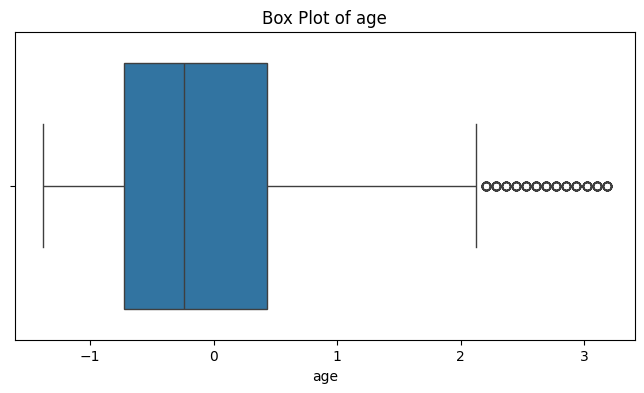

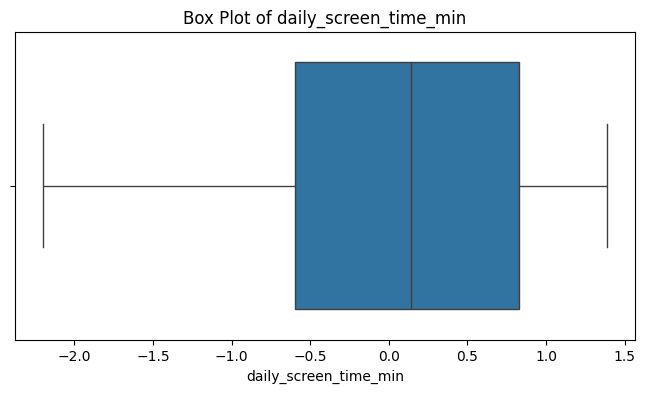

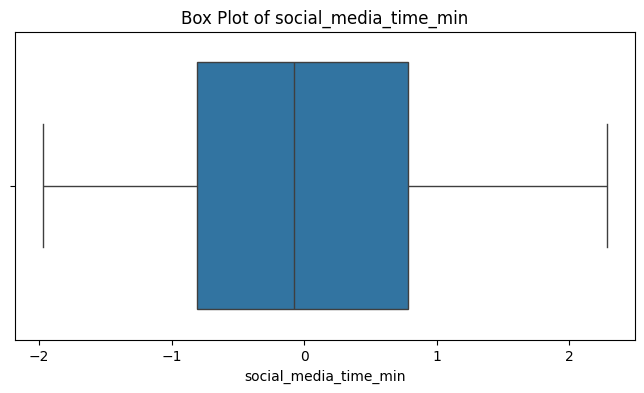

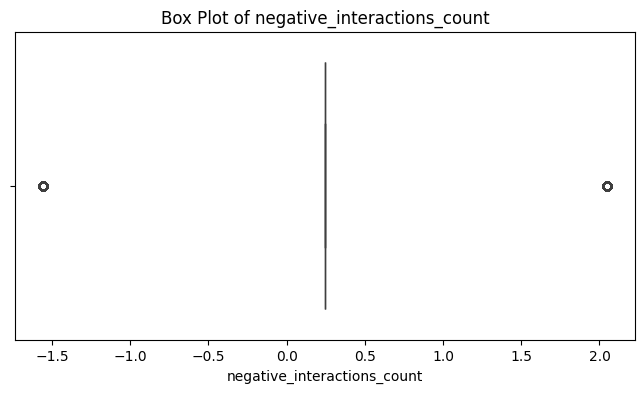

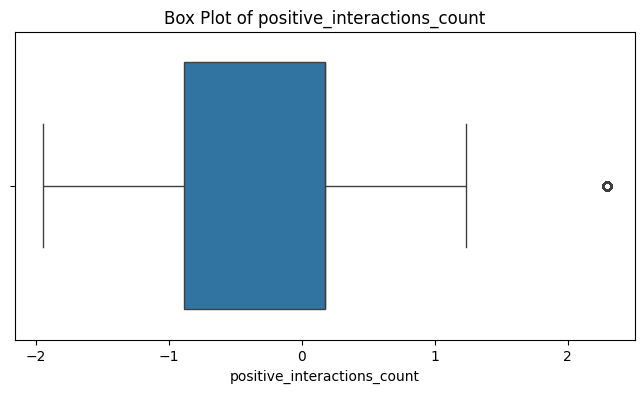

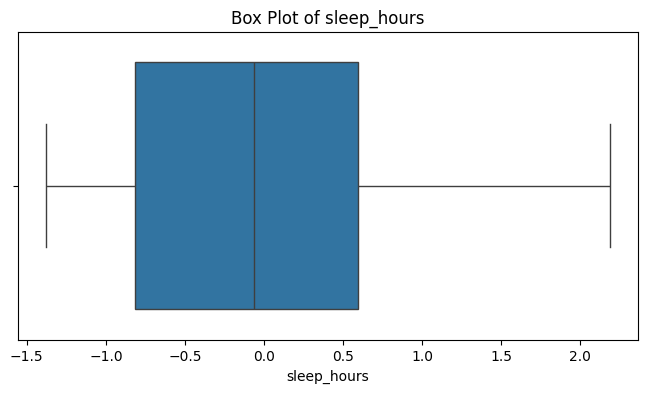

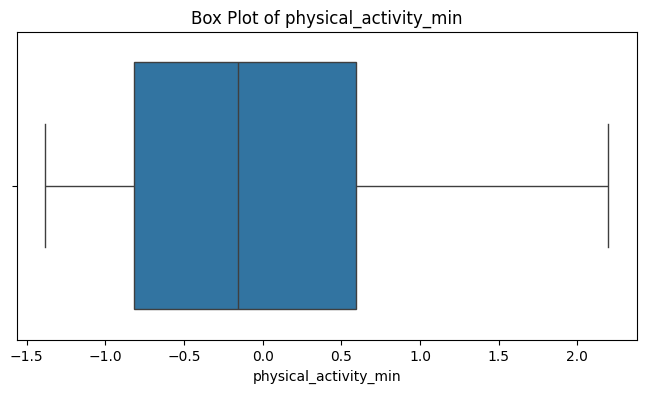

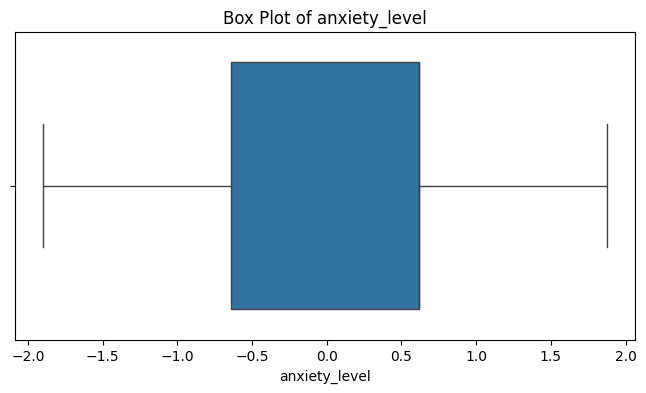

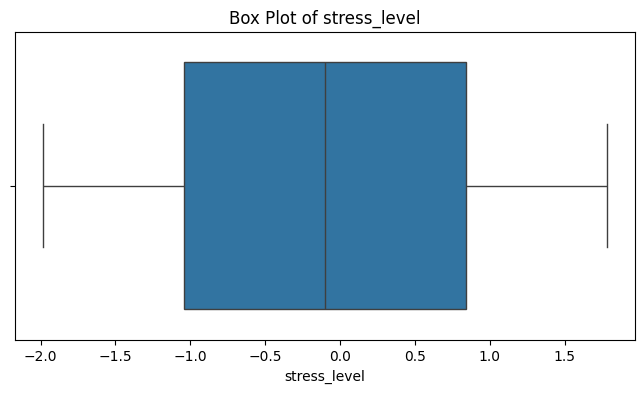

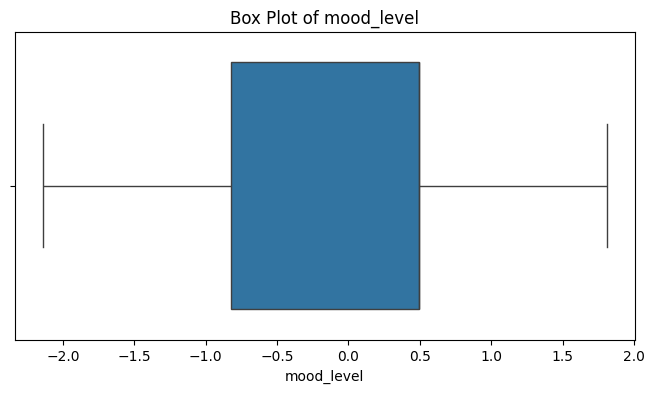


--- Boxplot After Handling Outlier :


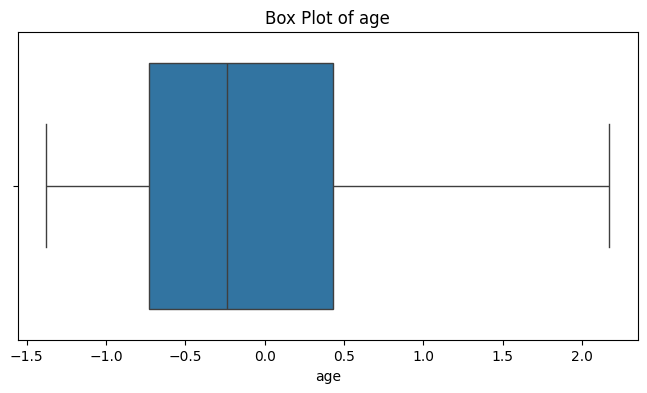

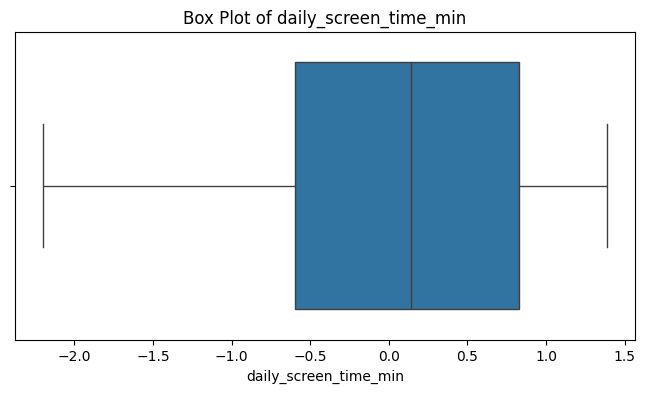

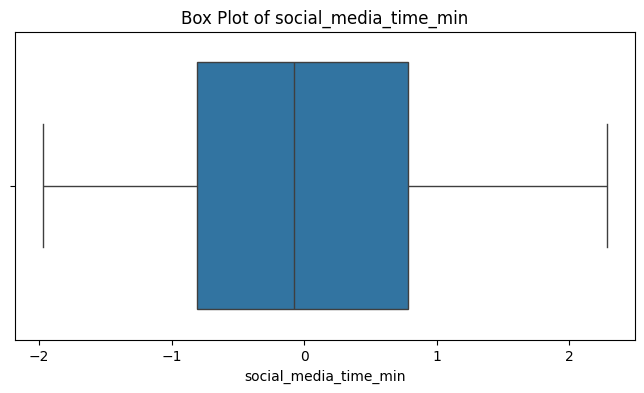

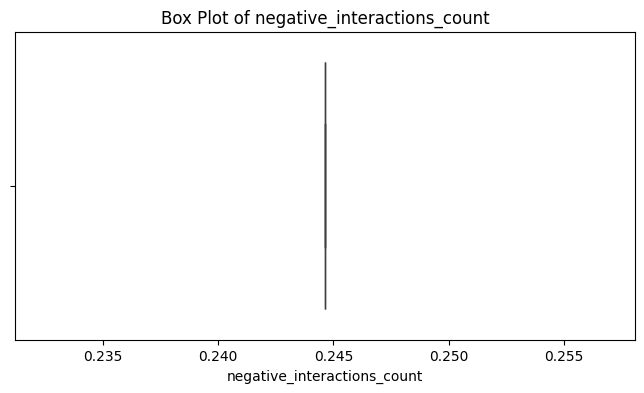

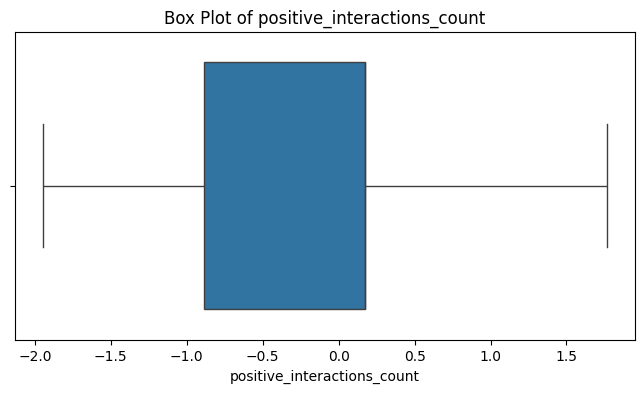

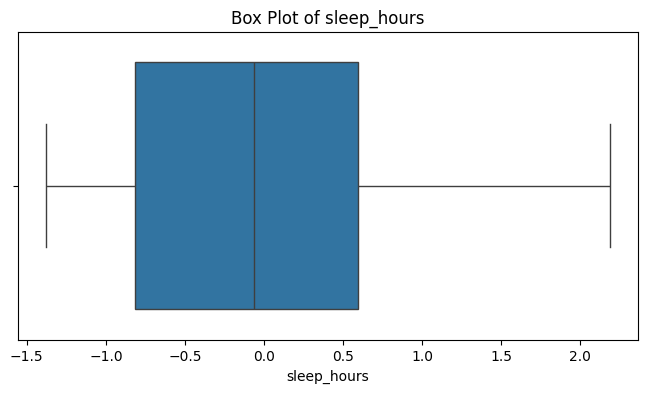

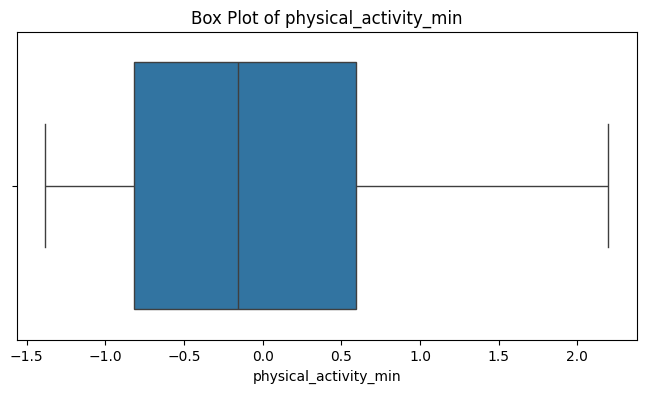

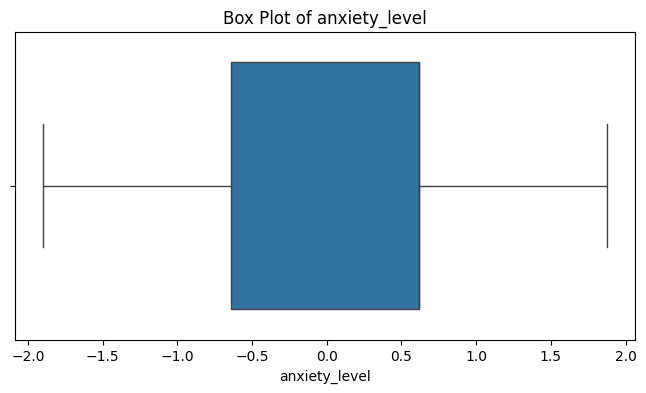

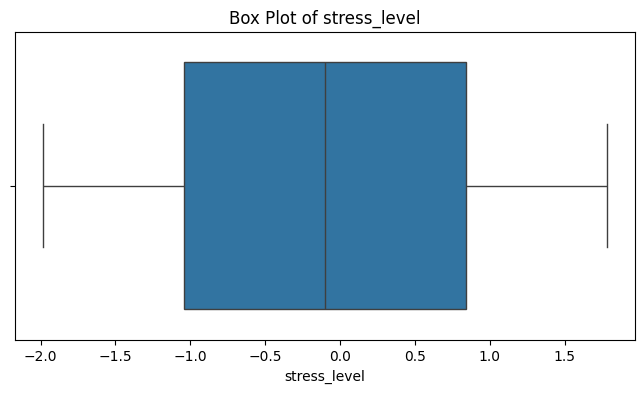

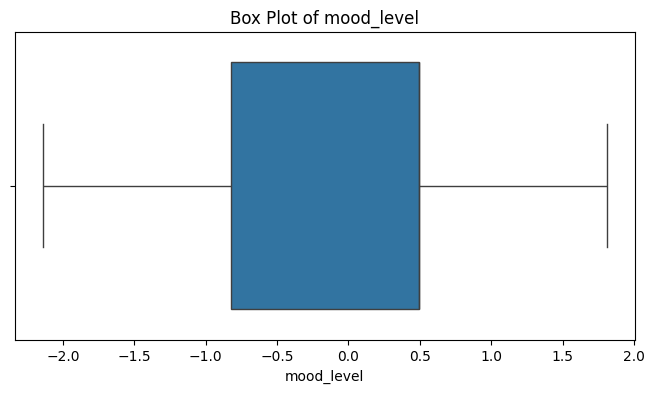

In [30]:
# 4. Deteksi dan penanganan outlier

# Memilih kolom numerik untuk deteksi outlier (setelah standarisasi)
print("Boxplot to Show Outlier : ")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

# Penangan outlier dengan capping
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Terapkan capping
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

print("\n--- Boxplot After Handling Outlier :")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()


In [31]:
# 5. Encoding data kategorikal

# Buat salinan DataFrame untuk encoding agar tidak mengganggu DataFrame asli
df_encoded = df.copy()

# Identifikasi kolom kategorikal untuk one-hot encoding
one_hot_cols = ['gender', 'platform']

# Lakukan one-hot encoding untuk 'gender' dan 'platform'
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=False)

# Identifikasi kolom target untuk label encoding
label_encode_col = 'mental_state'

# Lakukan label encoding untuk 'mental_state'
label_encoder = LabelEncoder()
df_encoded[label_encode_col] = label_encoder.fit_transform(df_encoded[label_encode_col])

print("Dataset setelah one-hot encoding dan label encoding:")
display(df_encoded.head())
print("\nValue counts for mental_state setelah label encoding:")
display(df_encoded[label_encode_col].value_counts())

Dataset setelah one-hot encoding dan label encoding:


,person_name,age,date,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,...,gender_Female,gender_Male,gender_Other,platform_Facebook,platform_Instagram,platform_Snapchat,platform_TikTok,platform_Twitter,platform_WhatsApp,platform_YouTube
0,Reyansh Ghosh,0.411460,1/1/2024,-0.500581,-0.215325,0.244632,0.174485,0.497701,0.500538,-0.642080,...,False,True,False,False,True,False,False,False,False,False
1,Neha Patel,-0.484399,1/12/2024,0.754215,0.711613,0.244632,1.234538,-0.815297,-0.725669,0.615914,...,True,False,False,False,True,False,False,False,False,False
2,Ananya Naidu,-0.321516,1/6/2024,-0.151502,0.290278,0.244632,0.174485,0.122559,0.123243,0.615914,...,False,True,False,False,False,True,False,False,False,False
3,Neha Das,2.172639,1/17/2024,-1.727073,-0.987773,0.244632,-0.885569,1.623128,1.726744,-0.642080,...,True,False,False,False,False,True,False,False,False,False
4,Reyansh Banerjee,0.085693,1/28/2024,0.093796,0.500945,0.244632,0.174485,-0.065012,-0.065404,0.615914,...,False,True,False,False,False,True,False,False,False,False



Value counts for mental_state setelah label encoding:


,count
mental_state,
2,4601
1,341
0,58


In [32]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   float64
 2   date                         5000 non-null   object 
 3   daily_screen_time_min        5000 non-null   float64
 4   social_media_time_min        5000 non-null   float64
 5   negative_interactions_count  5000 non-null   float64
 6   positive_interactions_count  5000 non-null   float64
 7   sleep_hours                  5000 non-null   float64
 8   physical_activity_min        5000 non-null   float64
 9   anxiety_level                5000 non-null   float64
 10  stress_level                 5000 non-null   float64
 11  mood_level                   5000 non-null   float64
 12  mental_state                 5000 non-null   int64  
 13  gender_Female     

In [33]:
# 6. Binning (Pengelompokan data)
# Mengelompokkan kolom 'age' ke dalam kategori usia

# Untuk mendapatkan nilai 'age' asli sebelum standarisasi dan capping,
# kita akan memuat ulang dataset secara sementara.
# Ini karena kolom 'age' di df_encoded telah distandarisasi dan ditangani outlier.
original_df = pd.read_csv(url)

# Definisikan batas-batas bin dan label
bins = [original_df['age'].min() - 1, 25, 59, original_df['age'].max() + 1] # -1 and +1 to include min/max
labels = ['Youth', 'Adult', 'Elderly']

# Buat kolom 'age_group' baru di df_encoded menggunakan nilai 'age' asli
df_encoded['age_group'] = pd.cut(original_df['age'], bins=bins, labels=labels, right=True)
